In [9]:

# Dependencies and Setup
import pandas as pd
import os
import matplotlib.pyplot as plt
import requests
from config import api_key
import random 
import numpy as np

# File to Load 
city_data_to_load = "Resources/worldcities.csv"

# Read world cities and their lat and long and put them into Panda dataframe
world_city_df = pd.read_csv(city_data_to_load)


# Create column and determine the hemisphere of each city 
world_city_df['Hemisphere'] = np.where(world_city_df['Latitude'] >= 0, 'N','S')

# set up additional columns to hold weather information
world_city_df['Processed'] = 'N'
world_city_df['Temperature (F)'] = 0
world_city_df['Humidity (%)'] = 0
world_city_df['Cloudiness (%)'] = 0
world_city_df['Wind Speed (mph)'] = 0

world_city_df

,Country,City,Latitude,Longitude,Hemisphere,Processed,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ad,andorra la vella,42.500000,1.516667,N,N,0,0,0,0
1,ad,canillo,42.566667,1.600000,N,N,0,0,0,0
2,ad,encamp,42.533333,1.583333,N,N,0,0,0,0
3,ad,la massana,42.550000,1.516667,N,N,0,0,0,0
4,ad,les escaldes,42.500000,1.533333,N,N,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
46827,zw,redcliffe,-19.033333,29.783333,S,N,0,0,0,0
46828,zw,rusape,-18.533333,32.116667,S,N,0,0,0,0
46829,zw,shurugwi,-19.666667,30.000000,S,N,0,0,0,0
46830,zw,victoria falls,-17.933333,25.833333,S,N,0,0,0,0


In [10]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

i = 0
# We will process 600 records 
while (i < 600): 
    # Get a random number ranging from 0 to the total record from dataframe 
    n = random.randint(0,len(world_city_df)) 
    # Assign the cityname for that particular random row selected 
    cityName = world_city_df.iloc[n,world_city_df.columns.get_loc("City")]
    # Check to see if the city has already been processed with the weather API info 
    if world_city_df.iloc[n,world_city_df.columns.get_loc("Processed")] == "N":
        # Call the weather api with for the given city 
        response = requests.get(query_url + cityName).json()
        
        # Ensure the city is found from the weather api web site then assign those columns with values from the weather api site 
        if requests.head(query_url + cityName).status_code==200:
            print(f"City selected - Number = {n} and name is {cityName}")
            world_city_df.iloc[n,world_city_df.columns.get_loc('Temperature (F)')] = response['main']['temp']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Humidity (%)')] = response['main']['humidity']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Cloudiness (%)')] = response['clouds']['all']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Wind Speed (mph)')] = response['wind']['speed']
            world_city_df.iloc[n,world_city_df.columns.get_loc("Processed")] = "Y"
            # Increment the count
            i = i + 1
        


is ikeda
City selected - Number = 37351 and name is novoshakhtinsk
City selected - Number = 19993 and name is sonqor
City selected - Number = 30263 and name is sula
City selected - Number = 44385 and name is fallon
City selected - Number = 22975 and name is tenenkou
City selected - Number = 27507 and name is bontoc
City selected - Number = 44910 and name is hope mills
City selected - Number = 14317 and name is trilofon
City selected - Number = 35898 and name is golubitskaya
City selected - Number = 44430 and name is hanover
City selected - Number = 28514 and name is la hacienda
City selected - Number = 32105 and name is almasu
City selected - Number = 37360 and name is novospasskoye
City selected - Number = 28485 and name is kumaliskis
City selected - Number = 5136 and name is bolobo
City selected - Number = 867 and name is kununurra
City selected - Number = 14202 and name is rodotopion
City selected - Number = 22707 and name is yafran
City selected - Number = 28732 and name is lucero


Correlation coefficient=-0.7652381363577664 calculated between temperatures and latitutes of cities.
Linear regression Line formula is y = -0.8x + 72.35
As -0.7652381363577664 is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitutes of the cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.


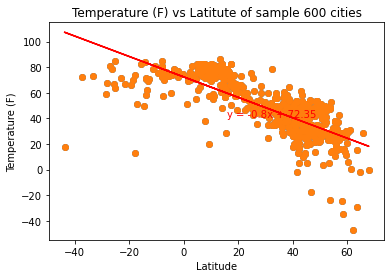

In [48]:
import scipy.stats as st
from scipy.stats import linregress
# Only want those processed 600 records
scatter = world_city_df.loc[world_city_df['Processed'] == "Y"]
x_values =  scatter["Latitude"]
y_values = scatter['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitutes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitutes of the cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title('Temperature (F) vs Latitute of sample 600 cities')
plt.savefig("Images/Scatter-Temperature (F) vs Latitute of sample 600 cities.png")
plt.show()

Correlation coefficient=0.2911472933999017 calculated between Humidity (%) and latitutes of cities.
Linear regression Line formula is y = 0.25x + 69.31
As 0.2911472933999017 is below 0.5 which indicates a weak or no relationship between humidity percentage and the latitutes of the cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


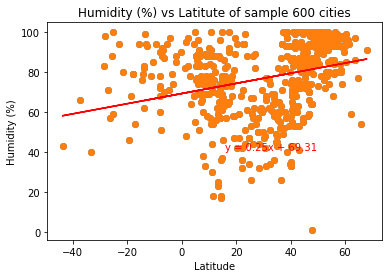

In [49]:
x_values = scatter["Latitude"]
y_values = scatter['Humidity (%)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Humidity (%) and latitutes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is below 0.5 which indicates a weak or no relationship between humidity percentage and the latitutes of the cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Humidity (%) vs Latitute of sample 600 cities')
plt.savefig("Images/Humidity (%) vs Latitute of sample 600 cities.png")
plt.show()

Correlation coefficient=0.1313450021224035 calculated between Cloudiness (%) and latitutes of cities.
Linear regression Line formula is y = 0.25x + 48.56
As 0.1313450021224035 is below 0.5 which indicates a weak or no relationship between cloudiness percentage and the latitutes of the cities. This scatter plot has NOT provided any evidence or replationship between cloudiness percentage and latitudes of those cities used in the sample data.


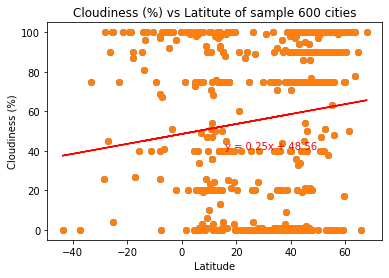

In [50]:
x_values =  scatter["Latitude"]
y_values = scatter['Cloudiness (%)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitutes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is below 0.5 which indicates a weak or no relationship between cloudiness percentage and the latitutes of the cities. This scatter plot has NOT provided any evidence or replationship between cloudiness percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Cloudiness (%) vs Latitute of sample 600 cities')
plt.savefig("Images/Cloudiness (%) vs Latitute of sample 600 cities.png")
plt.show()

Correlation coefficient=-0.0017078635489743289 calculated between Wind Speed and latitutes of cities.
Linear regression Line formula is y = -0.0x + 7.69
As -0.0017078635489743289 is very close to 0 which indicates a weak or no relationship between wind speed and the latitutes of the cities. This scatter plot has NOT provided any evidence or replationship between wind speed and latitudes of those cities used in the sample data.


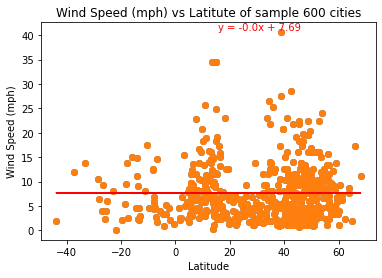

In [51]:
x_values =  scatter["Latitude"]
y_values  = scatter['Wind Speed (mph)']
 
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed and latitutes of cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is very close to 0 which indicates a weak or no relationship between wind speed and the latitutes of the cities. This scatter plot has NOT provided any evidence or replationship between wind speed and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Wind Speed (mph) vs Latitute of sample 600 cities')
plt.savefig("Images/Wind speed (mph) vs Latitute of sample 600 cities.png")
plt.show()

In [24]:
# Need to divide between Northern and Southern hemisphere cities into different datafreame for further evalution
# More Northern cities than south 
scatterSouth = scatter.loc[scatter['Hemisphere'] == "S"]
scatterNorth = scatter.loc[scatter['Hemisphere'] == "N"]
len(scatterSouth.index)
len(scatterNorth.index)


551

In [52]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitutes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitutes of Northern Hemisphere cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Temperature (F)")
#plt.title('Temperature (F) vs Latitute of Northern Hemisphere cities')
#plt.savefig("Images/Temoperature (F) vs Latitute of sample 600 cities.png")
#plt.show()

Correlation coefficient=-0.822156670283163 calculated between temperatures and latitutes of Northern Hemisphere cities.
Linear regression Line formula is y = -1.07x + 83.33
As -0.822156670283163 is between -0.5 to -1 which indicates a strong relationship between temperatures and the latitutes of Northern Hemisphere cities. This scatter plot has indicated higher temperature cities tend to located on lower latitudes coordinates of cities used in the sample data.


In [53]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitutes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between temperatures and the latitutes of Southern Hemisphere cities. That might be because of the lack and the limited number of southern hemisphere cities found. Anyhow, this scatter plot has NOT provided any evidence or relationship between temperature and latitute of cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Temperature (F)")
#plt.title('Temperature (F) vs Latitute of Southern Hemisphere cities')
#plt.show()

Correlation coefficient=0.3593262812765311 calculated between temperatures and latitutes of Southern Hemisphere cities.
Linear regression Line formula is y = 0.51x + 77.06
As 0.3593262812765311 is between 0 and -0.5 which indicates a weak or no relationship between temperatures and the latitutes of Southern Hemisphere cities. That might be because of the lack and the limited number of southern hemisphere cities found. Anyhow, this scatter plot has NOT provided any evidence or relationship between temperature and latitute of cities used in the sample data.


Correlation coefficient=0.39411609738635217 calculated between temperatures and latitutes of Northern Hemisphere cities.
Linear regression Line formula is y = 0.45x + 61.37
As 0.39411609738635217 is below -0.5 which indicates a weak or no relationship between humidity percentage and the latitutes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


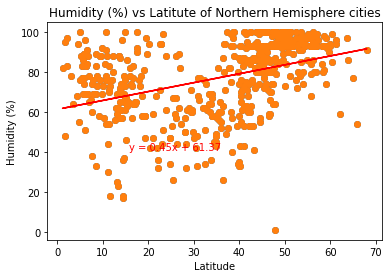

In [38]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Humidity (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitutes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitutes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Humidity (%) vs Latitute of Northern Hemisphere cities')
plt.show()

In [54]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Humidity (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between temperatures and latitutes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitutes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Humidity (%)")
#plt.title('Humidity (%) vs Latitute of Southern Hemisphere cities')
#plt.show()

Correlation coefficient=0.36572894055405425 calculated between temperatures and latitutes of Southern Hemisphere cities.
Linear regression Line formula is y = 0.57x + 86.31
As 0.36572894055405425 is between 0 and -0.5 which indicates a weak or no relationship between humidity percentage and the latitutes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between humidity percentage and latitudes of those cities used in the sample data.


In [55]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Cloudiness (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitutes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitutes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Cloudiness (%)")
#plt.title('Cloudiness (%) vs Latitute of Northern Hemisphere cities')
#plt.show()

Correlation coefficient=0.28716533509467274 calculated between Cloudiness (%) and latitutes of Northern Hemisphere cities.
Linear regression Line formula is y = 0.71x + 29.75
As 0.28716533509467274 is betweenn 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitutes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.


Correlation coefficient=0.29271061985202285 calculated between Cloudiness (%) and latitutes of Southern Hemisphere cities.
Linear regression Line formula is y = 1.0x + 88.68
As 0.29271061985202285 is between 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitutes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.


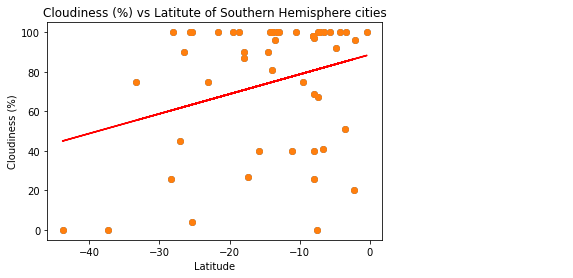

In [42]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Cloudiness (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Cloudiness (%) and latitutes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is between 0 and -0.5 which indicates a weak or no relationship between Cloudiness percentage and the latitutes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Cloudiness percentage and latitudes of those cities used in the sample data.")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Cloudiness (%) vs Latitute of Southern Hemisphere cities')
plt.show()

In [59]:
x_values =  scatterNorth["Latitude"]
y_values = scatterNorth['Wind Speed (mph)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed (mph) and latitutes of Northern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitutes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Wind Speed (mph)")
#plt.title('Wind Speed (mph) vs Latitute of Northern Hemisphere cities')
#plt.show()

Correlation coefficient=-0.05410229675263893 calculated between Wind Speed (mph) and latitutes of Northern Hemisphere cities.
Linear regression Line formula is y = -0.02x + 8.46
As -0.05410229675263893 is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitutes of Northern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.


In [58]:
x_values =  scatterSouth["Latitude"]
y_values = scatterSouth['Wind Speed (mph)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15.8,41),fontsize=10,color="red")
#plt.scatter(x_values,y_values)
print(f"Correlation coefficient={rvalue} calculated between Wind Speed (mph) and latitutes of Southern Hemisphere cities.")
print(F"Linear regression Line formula is {line_eq}")
print(F"As {rvalue} is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitutes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.")
#plt.xlabel("Latitude")
#plt.ylabel("Wind Speed (mph)")
#plt.title('Wind Speed (mph) vs Latitute of Southern Hemisphere cities')
#plt.show()

Correlation coefficient=-0.16600347696224288 calculated between Wind Speed (mph) and latitutes of Southern Hemisphere cities.
Linear regression Line formula is y = -0.08x + 5.32
As -0.16600347696224288 is betweenn 0 and -0.5 which indicates a weak or no relationship between Wind Speed (mph) and the latitutes of Southern Hemisphere cities. This scatter plot has NOT provided any evidence or relationship between Wind Speed (mph) percentage and latitudes of those cities used in the sample data.


In [63]:
# Because we are only taken the temperature, humidity, cloudines and wind speed at one instance of those cities hence the accuracy of data might not be that reliable. It would be better if we can take a reading of those cities and continue for a pdriod of a month or two and then calculate the mean of those values and plot them using the scatter plots would, I think, provide a more accurate statistical output than our current one.    

scatter.to_csv('Resources/cityWeatherResult.csv', index=False)